In [1]:
import sys, os, time
import shutil
# %pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [2]:
M = Hybrid_Controller('/is/ei/fleeb/workspace/media/hybrid/final').filter_strs('!test')

Found 78 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [5]:
M.clear_filters().filter_strs('!test')

M.prep_info(name='model.pth.tar')

M.sort_by('date')
pass
M.show()


Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs
  0) 3dshapes-vae_0028-6046939-02_200131-124807_ckpt30
  1) 3dshapes-fwae_0028-6046939-05_200131-124815_ckpt30
  2) 3dshapes-vae_0028-6046939-03_200131-124821_ckpt30
  3) 3dshapes-wae_0028-6046939-01_200131-124832_ckpt30
  4) 3dshapes-fvae_0029-6046947-06_200131-125026_ckpt30
  5) 3dshapes-dae_0030-6046949-02_200131-125904_ckpt30
  6) 3dshapes-ae_0030-6046949-00_200131-125923_ckpt30
  7) 3dshapes-fae_0031-6046954-00_200131-132552_ckpt30
  8) 3dshapes-dae_0035-6048636-06_200131-185348_ckpt30
  9) 3dshapes-vae_0035-6048636-04_200131-185348_ckpt30
 10) 3dshapes-fvae_0035-6048636-08_200131-185352_ckpt30
 11) 3dshapes-wae_0035-6048636-03_200131-185353_ckpt30
 12) 3dshapes-vae_0035-6048636-05_200131-185514_ckpt30
 13) 3dshapes-fae_0035-6048636-07_200131-185701_ckpt30
 14) 3dshapes-ae_0035-6048636-02_200131-185834_ckpt30
 15) box-s3-ae_0074-6051172-00_200202-205115_ckpt51
 16) box-s3-vae_0074-6051172-02_200202-205747_ckpt51
 17) box-s3-wae_0074-6051172-01_200202-205635_ckpt51
 

In [6]:
# M.show('ckpt')

In [7]:
M.clear_run_cache()

In [8]:
# M[0].ckpt_path

In [9]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# tmpl= 'unbuffer python hybrid.py n/t/nocap2cap --load {}'#' --model.lr 5e-4'
tmpl= 'unbuffer python hybrid.py --legacy 0 --resume {}'

# print('\n'.join(tmpl.format(n) for n in M.through().name))

In [10]:
run = M[0]
run.name

'3dshapes-vae_0028-6046939-02_200131-124807_ckpt30'

In [11]:
run.path

'/is/ei/fleeb/workspace/media/hybrid/final/3dshapes-vae_0028-6046939-02_200131-124807_ckpt30'

In [12]:
run.results = torch.load(os.path.join(run.path, 'results.pth.tar'))
run.results.keys()

dict_keys(['disent', 'O', 'R', 'L', 'Q', 'G', 'H', 'key', 'fid'])

In [13]:
Q = run.results['Q']
Q.shape

torch.Size([128, 12])

In [14]:
S = run.reset()
S.A = trn.get_config()
din = (3, 64, 64)
S.A.din, S.A.dout = din, din

run.load(fast=True)

Fast: loading only model
/is/ei/fleeb/workspace/media/hybrid/final/3dshapes-vae_0028-6046939-02_200131-124807_ckpt30/model.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/media/hybrid/final/3dshapes-vae_0028-6046939-02_200131-124807_ckpt30/model.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
Model-type: vpp
Creating encoder (type=double-enc) (mod=normal)
  latent_dim: 12 (in parent)
  min_log_std: None (by default)
  in_shape --> din: (3, 64, 64) (in parent)
  channels: [64, 64, 64, 128, 128] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 24
  Creating tail (type=mlp)
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 24
    hidden_dims: [256, 128]
    nonlin: elu (in parent)
    output_nonlin: None (by default)
  nonlin: elu (in parent)
  output_nonlin: None (by default)
  output_norm_type: N

In [15]:
model = S.model

In [73]:
idx = 0
batch = 4
steps = 10

In [74]:
q = Q[idx:idx+batch]
q.shape

torch.Size([4, 12])

In [75]:
with torch.no_grad():
    original = gen_target(model, Q=q.cuda()).cpu()
original.shape

torch.Size([4, 3, 64, 64])

<IPython.core.display.Javascript object>


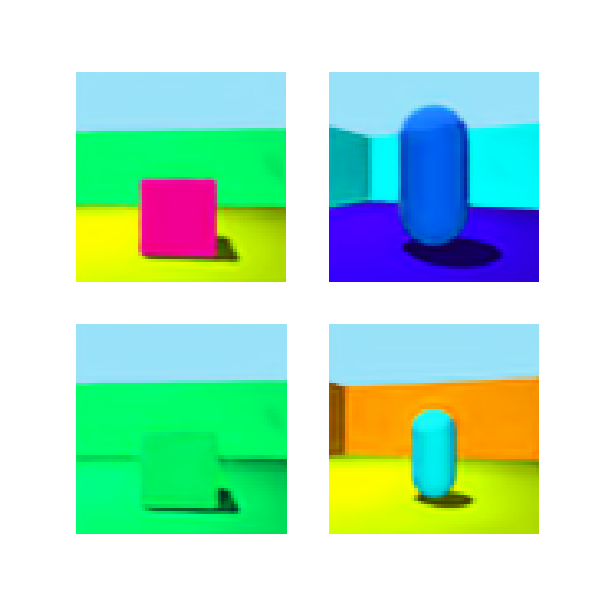

In [76]:
show_nums(original)

In [55]:
q

tensor([[-0.0030,  1.2280,  0.0299,  0.0307, -0.0319, -0.0847,  0.9482, -0.6254,
         -0.0048, -0.0397, -0.1979,  1.5487],
        [ 0.0631, -1.0546, -0.7288,  0.0518, -0.0053,  1.6495,  1.0563,  0.2785,
         -0.0412,  0.0498,  1.0611,  1.4249],
        [ 0.0412, -0.2718, -0.0028,  0.0038, -0.1128,  0.3875,  0.3060, -0.6691,
         -0.0554,  0.0147, -0.3297,  1.5173],
        [-0.0578, -0.3037,  0.3372, -0.0075,  0.0739, -0.2257, -0.9056, -0.4013,
          0.0356, -0.0816,  1.2543, -0.3202]])

In [77]:
vecs = get_traversal_vecs(q, steps=steps, bounds=(-2,2)).contiguous()
vecs.shape

torch.Size([4, 12, 10, 12])

In [78]:
# vecs[0,0]

In [79]:
deltas = torch.diagonal(vecs, dim1=-3,dim2=-1)
deltas.shape

torch.Size([4, 10, 12])

In [80]:
# deltas[0,:,:3]

In [81]:
imgs = get_traversals(vecs, model)
imgs.shape

torch.Size([4, 12, 10, 3, 64, 64])

In [82]:
idx = 0,2
raw = imgs[idx]
nums = deltas[idx[0],:,idx[1]]
raw.shape, nums.shape

(torch.Size([10, 3, 64, 64]), torch.Size([10]))

<IPython.core.display.Javascript object>


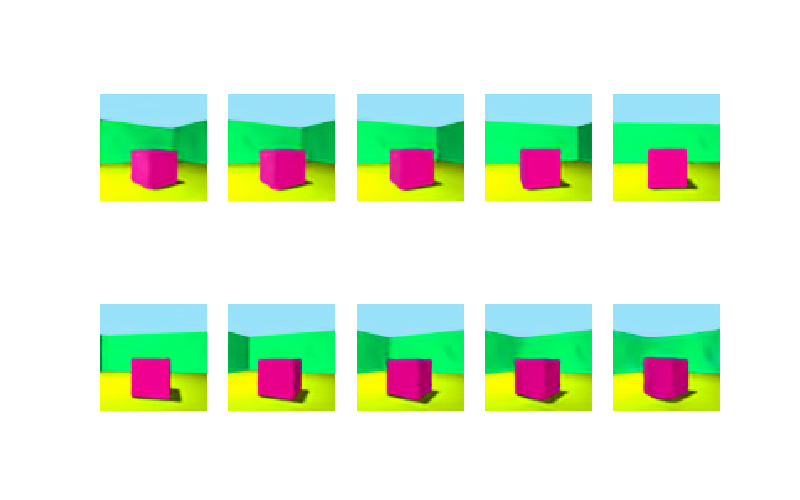

In [83]:
show_nums(raw, figsize=(8,5))

In [95]:
from matplotlib import animation

In [84]:
frames = raw.clone()
frames.shape

torch.Size([10, 3, 64, 64])

In [86]:
frames = frames.permute(0, 2,3,1).cpu().numpy()
frames.shape

(10, 64, 64, 3)

In [88]:
vals = nums.cpu().numpy()
vals.shape

(10,)

In [89]:
frame, v = frames[0], vals[0]

In [116]:
scale = 2
fps = 3

In [107]:
H, W, C = frames[0].shape
asp = W/H
fig = plt.figure(figsize=(asp, 1), dpi=int(H*scale),)

ax = plt.axes([0, 0, 1, 1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.autoscale(tight=True)

im = plt.imshow(frames[0])
# plt.axis('off')
# plt.tight_layout()
txt = plt.text(5,12, '{:2.2f}'.format(v), size=12)
pass

<IPython.core.display.Javascript object>


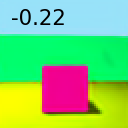

In [108]:
# fig

In [117]:


plt.close()

def init():
    im.set_data(frames[0])
    txt.set_text('{:2.2f}'.format(vals[0]))

def animate(i):
    im.set_data(frames[i])
    txt.set_text('{:2.2f}'.format(vals[i]))
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames), interval=1000//fps)


In [118]:
from IPython.display import HTML

In [119]:
HTML(anim.to_html5_video())

In [ ]:
# anim.save("anim.png", writer="imagemagick")

In [31]:

# def add_text(imgs, deltas=None, pbar=None, delta_fmt='{:2.2f}', fontsize=12):#text_size=(0.25, 0.25)):

#     *shape, C, H, W = imgs.shape

#     assert tuple(deltas.shape) == tuple(shape), '{} vs {}'.format(shape, deltas.shape)

#     imgs = imgs.view(-1, C, H, W).cpu().permute(0,2,3,1).numpy()

#     if deltas is not None:

#         deltas = deltas.view(-1).cpu().numpy()
#         deltas = [delta_fmt.format(d) for d in deltas]

#         itr = zip(imgs, deltas)
#         if pbar is not None:
#             itr = pbar(itr)
#             itr.set_description('Adding text')

#         ims = []
#         for img, d in itr:

#             im = Image.fromarray(img.astype('uint8') * 255)
# #             font = ImageFont.truetype(fontsize)

#             img_draw = ImageDraw.Draw(im)
#             # img_draw.rectangle((70, 50, 270, 200), outline='red', fill='blue')
#             img_draw.text((5, 5), d, fill='black')#, font=font)

#             ims.append(np.array(im))

#         imgs = np.stack(ims)

#     return imgs.reshape(*shape, H, W, C)

In [32]:
# frames = add_text(raw, nums, pbar=tqdm, fontsize=12)
# frames.shape

In [30]:
# plt.imshow(frames[0])
# plt.show()

In [26]:
vid = util.Video(frames)
vid.play(mode='jupyter', scale=4)

In [ ]:
frames

In [ ]:
def play(self, mode='mpl', scale=1):

    if mode == 'mpl':
        play_back(self.frames)
    elif mode == 'jupyter':
        return HTML(self.as_animation(scale=scale).to_html5_video())
    else:
        raise Exception('Unknonwn mode: {}'.format(mode))

def as_animation(self, scale=1, fps=20):

    H, W, C = self.frames[0].shape

    asp = W/H

    fig = plt.figure(figsize=(asp, 1), dpi=int(H*scale),)

    ax = plt.axes([0, 0, 1, 1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)

    im = plt.imshow(self.frames[0])
    # plt.axis('off')
    # plt.tight_layout()

    plt.close()

    def init():
        im.set_data(self.frames[0])

    def animate(i):
        im.set_data(self.frames[i])
        return im

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(self.frames), interval=1000//fps)

    return anim

In [11]:
M.clear_run_cache()

In [12]:
S = run.reset()

In [13]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [58]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/celeba-fwae_0055-6050351-06_200201-215029/checkpoint_40.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/celeba-fwae_0055-6050351-06_200201-215029/checkpoint_40.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
crop_size: 128 (by default)
crop_loc: center (by default)
dataroot: /is/ei/fleeb/workspace/local_data (in parent)
label_type: None (by default)
train: True
resize: None
din: (3, 128, 128)
dout: (3, 128, 128) (by default)
Model-type: fwpp
latent_disc: None (by default)
reg_prior: 0.01
ldisc_steps: 1 (by default)
ldisc_gp: 10.0 (by default)
Creating encoder (type=double-enc)
  in_shape --> din: (3, 128, 128) (in parent)
  channels: [64, 64, 128, 128, 128, 256] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 32 (in parent)
  Creat

In [59]:
run.run(pbar=tqdm)

Using 1000 samples



Storing 16277 latent vectors


In [60]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/celeba-fwae_0055-6050351-06_200201-215029/checkpoint_40.pth.tar'

In [61]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


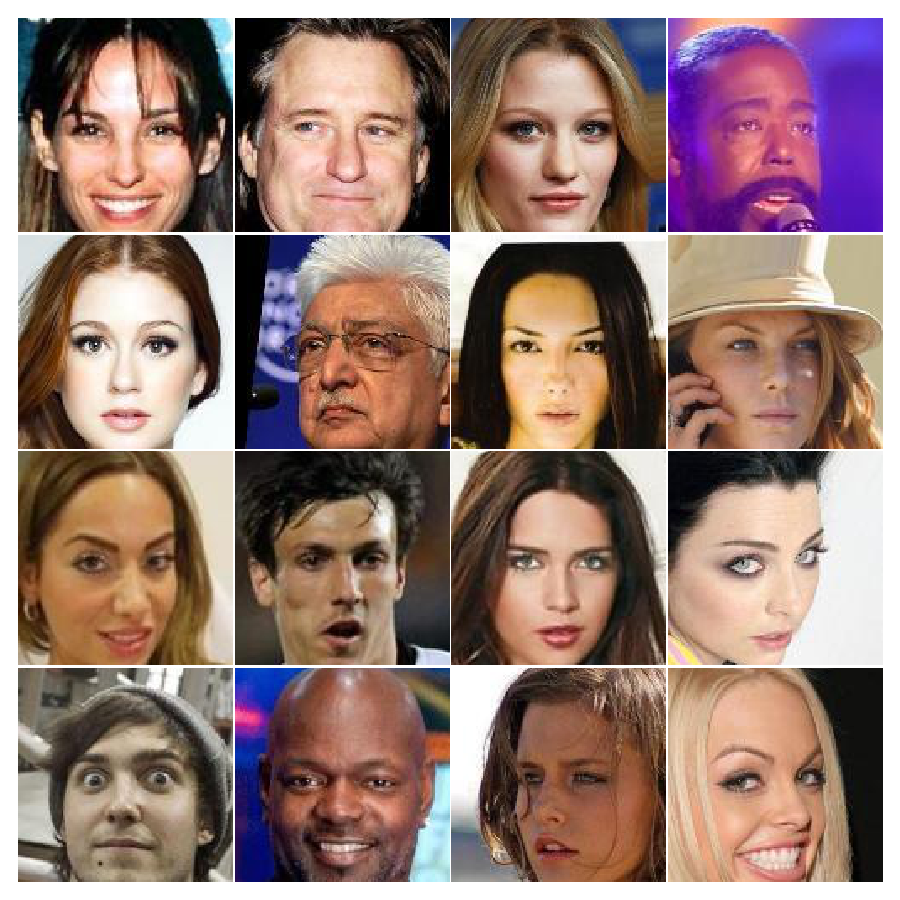

In [70]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


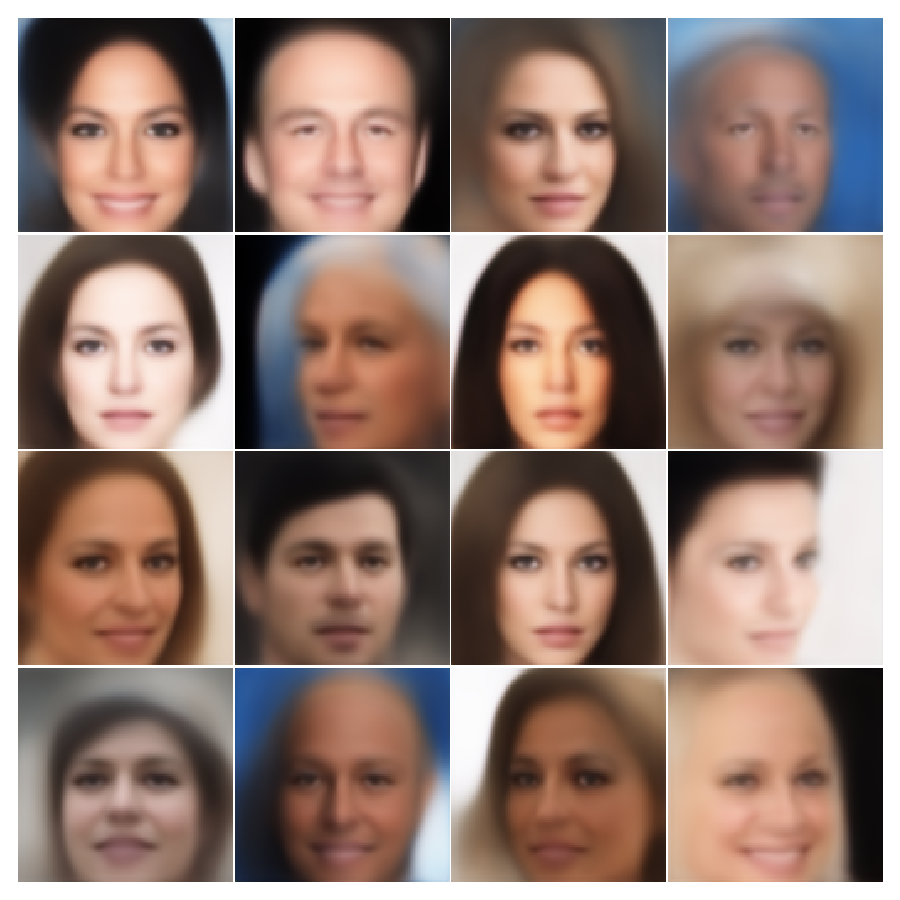

In [80]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


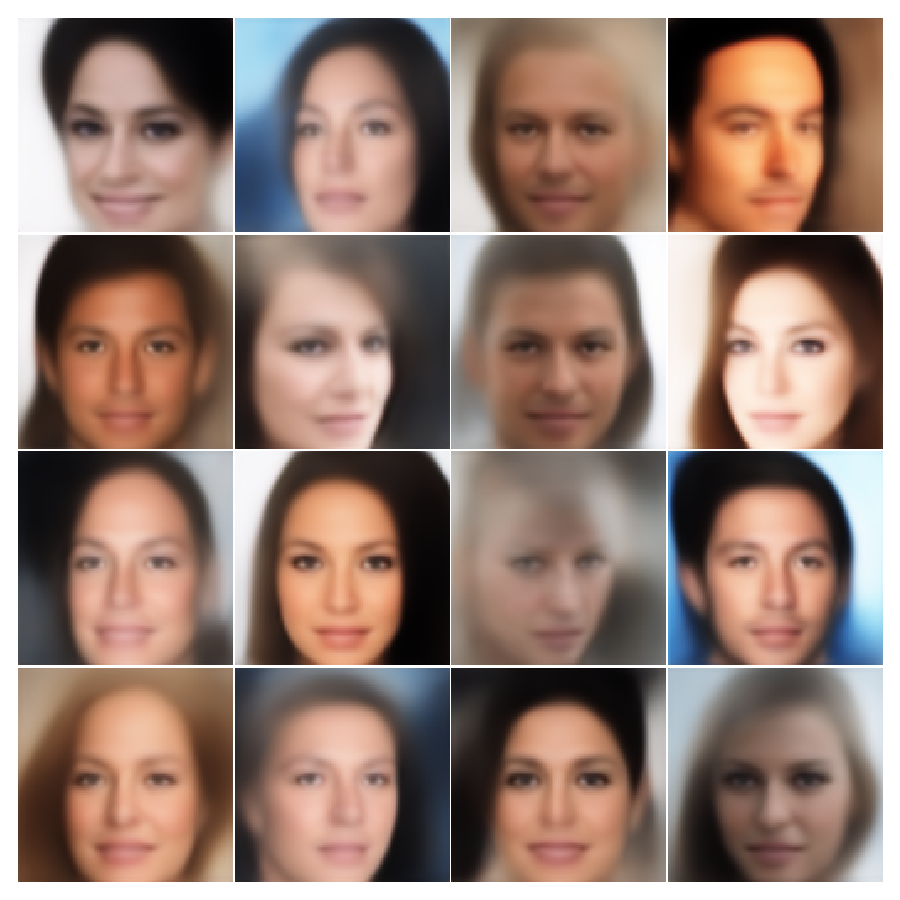

In [71]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


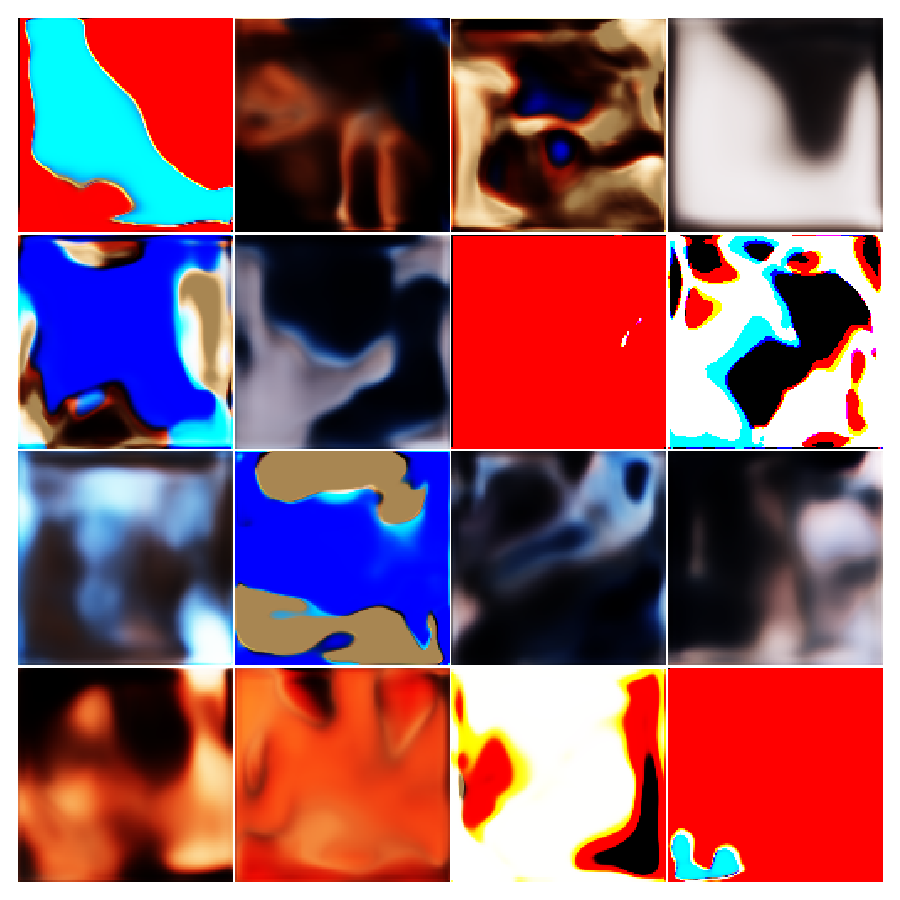

In [79]:
viz['gens'][0].view(scale=2)

In [78]:
viz['traversals'][0].view(scale=2)

<IPython.core.display.Javascript object>


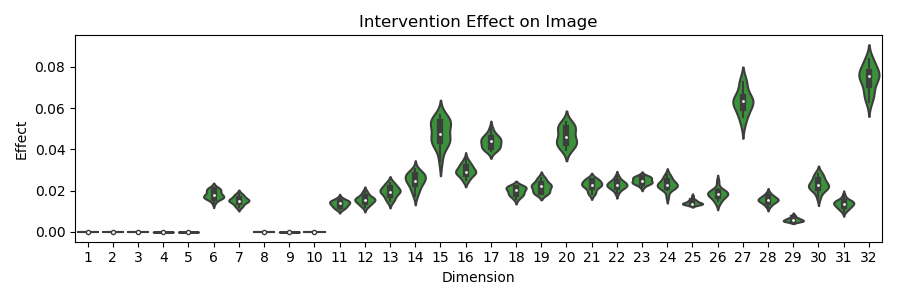

In [73]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


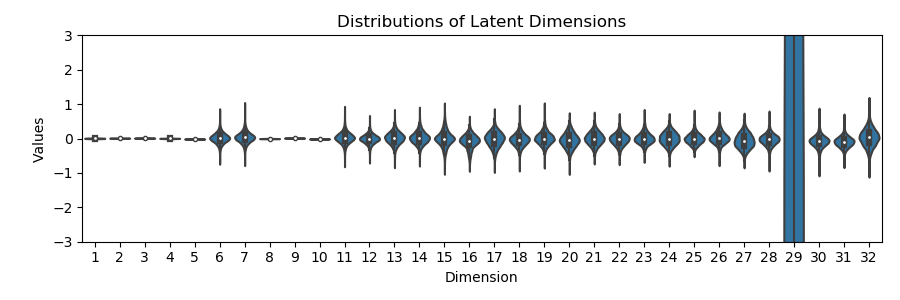

In [82]:
fig = viz['latent'][0].view(scale=2)
plt.figure(fig.number)
ax = fig.get_axes()[0]
ax.set_ylim(-3, 3)
fig

In [69]:
evals = run.evaluate(pbar=tqdm)

--- Evaluating: FID-prior


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-8a572dc4623f>", line 1, in <module>
    evals = run.evaluate(pbar=tqdm)
  File "/is/ei/fleeb/workspace/foundation/foundation/train/analysis.py", line 123, in evaluate
    results[k] = fn(self.state, pbar=pbar)
  File "/is/ei/fleeb/workspace/gh-projects/hybrid/analyze.py", line 680, in _top_fn
    S.fid_gen_stats[gen_type] = compute_inception_stat(generate, inception=inception, pbar=pbar)
  File "/is/ei/fleeb/workspace/gh-projects/hybrid/run_fid.py", line 123, in compute_inception_stat
    pred_arr[j:j+N] = pred.cpu().numpy().reshape(N, -1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 

KeyboardInterrupt: 

> /is/ei/fleeb/workspace/gh-projects/hybrid/run_fid.py(123)compute_inception_stat()
    121                         pred = adaptive_avg_pool2d(pred, output_size=(1, 1))
    122 
--> 123                 pred_arr[j:j+N] = pred.cpu().numpy().reshape(N, -1)
    124 
    125                 j += N

ipdb> q


In [27]:
update_checkpoint(S, 'evals', overwrite=True)

Updated 1 keys: ['evals']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-wgan_0036-6048638-01_200131-185403/checkpoint_30.pth.tar


In [28]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [29]:
# run.ckpt_path

In [30]:
# run.meta.history

In [31]:
# print(run.state.model)

In [32]:
# S.keys()

In [33]:
# S.hello = 'world'

In [34]:
# update_checkpoint(S, 'hello')

In [35]:
# viz_

In [36]:
# S.fid_gen_stats.keys()

In [37]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [38]:
# import pickle

In [39]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [40]:
# f

In [41]:
# run.state.keys()

In [42]:
# model = run.state.model

In [43]:
# q = run.state.q
# q.shape

In [44]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [45]:
# show_nums(imgs)

In [47]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/gans/'
# run.save(media_root, overwrite=True)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/gans/3dshapes-wgan_0036-6048638-01_200131-185403_ckpt30
	Model saved
	Config saved
	Visualization saved
	Evaluation saved


'/is/ei/fleeb/workspace/media/hybrid/gans/3dshapes-wgan_0036-6048638-01_200131-185403_ckpt30'